# Basic Imports

In [5]:
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

import pandas as pd
pd.set_option('display.max_colwidth', 100)

import string
string.punctuation

import re

import nltk
stopword = nltk.corpus.stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Read data using Pandas

In [6]:
fullcorpus = pd.read_csv('/Users/monsharm6/Projects/NaturalLanguageProcessing/UrduDataset/RomanUrduDataSet.csv', 
                         sep=',', header=None)

In [7]:
fullcorpus.head(200)

ImportError: cannot import name 'is_url' from 'pandas.io.common' (/anaconda3/lib/python3.7/site-packages/pandas/io/common.py)

                                                                                                       0  \
0      Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus   
1                                                                                              sahi bt h   
2                                                                                            Kya bt hai,   
3                                                                                             Wah je wah   
4                                                                                   Are wha kaya bat hai   
5                                                                                     Wah kya baat likhi   
6                                                                                  Wha Itni sari khubiya   
7                                                                                           Itni khubiya   
8                           

In [29]:
fullcorpus.columns = ['body_text', 'sentiment', 'junk']

In [30]:
fullcorpusI = fullcorpus.drop(['junk'], axis=1)

In [31]:
fullcorpusI.head()

,body_text,sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive


In [32]:
fullcorpusI.shape

(20229, 2)

In [33]:
fullcorpusI[fullcorpusI['sentiment'] == 'Positive'].count()

body_text    6013
sentiment    6013
dtype: int64

In [34]:
fullcorpusI[fullcorpusI['sentiment'] == 'Negative'].count()

body_text    5286
sentiment    5286
dtype: int64

In [35]:
fullcorpusI[fullcorpusI['sentiment'] == 'Neutral'].count()

body_text    8928
sentiment    8929
dtype: int64

In [36]:
fullcorpusI = fullcorpusI[fullcorpusI.sentiment != 'Neutral']

In [37]:
fullcorpusI.shape

(11300, 2)

In [13]:
fullcorpusI['body_text'] = fullcorpusI['body_text'].apply(lambda x: x.lower())

In [14]:
# Filtering only valid texts and words. 
fullcorpusI['body_text'] = fullcorpusI['body_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

In [38]:
print(fullcorpusI[fullcorpusI['sentiment'] == 'Positive'].size)

12026


In [39]:
print(fullcorpusI[fullcorpusI['sentiment'] == 'Negative'].size)

10572


In [40]:
fullcorpusI[fullcorpusI['sentiment'] == 'Negative'].count()

body_text    5286
sentiment    5286
dtype: int64

In [41]:
fullcorpusI[fullcorpusI['sentiment'] == 'Positive'].count()

body_text    6013
sentiment    6013
dtype: int64

In [42]:
fullcorpusI['sentiment'] = [1 if sentiment == 'Positive' else 0 for sentiment in fullcorpusI['sentiment'].values]

In [43]:
fullcorpusI.head()

,body_text,sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,1
1,sahi bt h,1
2,"Kya bt hai,",1
3,Wah je wah,1
4,Are wha kaya bat hai,1


In [44]:
fullcorpusI[fullcorpusI['sentiment'] == 1].count()

body_text    6013
sentiment    6013
dtype: int64

In [45]:
fullcorpusI[fullcorpusI['sentiment'] == 0].count()

body_text    5287
sentiment    5287
dtype: int64

# Remove punctuation

In [46]:
def remove_punctuation(text):
    # Iterate over characters in text and return character if it is not in string.punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [47]:
fullcorpusI['body_text_nopunct'] = fullcorpusI['body_text'].apply(lambda x: remove_punctuation(x))

In [48]:
fullcorpusI.head(200)

,body_text,sentiment,body_text_nopunct
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,1,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus
1,sahi bt h,1,sahi bt h
2,"Kya bt hai,",1,Kya bt hai
3,Wah je wah,1,Wah je wah
4,Are wha kaya bat hai,1,Are wha kaya bat hai
5,Wah kya baat likhi,1,Wah kya baat likhi
6,Wha Itni sari khubiya,1,Wha Itni sari khubiya
7,Itni khubiya,1,Itni khubiya
8,Ya allah rehm farma hm sab pe or zalimo ko hidayat de ameen,1,Ya allah rehm farma hm sab pe or zalimo ko hidayat de ameen
9,Please Everyone AllAh S.w.T ka naam hAmesha Bary Lawzo main Likha kary Wo he Zaat sUb say Bari Hey,1,Please Everyone AllAh SwT ka naam hAmesha Bary Lawzo main Likha kary Wo he Zaat sUb say Bari Hey


# Feature Engineering

## Create a feature for text message length
* Working under the hypothesis that negative messages are longer than positive messages.

In [49]:
fullcorpusI['body_length'] = fullcorpusI['body_text'].apply(lambda x: len(x) - x.count(" "))

In [50]:
fullcorpusI.head()

,body_text,sentiment,body_text_nopunct,body_length
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,1,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,73
1,sahi bt h,1,sahi bt h,7
2,"Kya bt hai,",1,Kya bt hai,9
3,Wah je wah,1,Wah je wah,8
4,Are wha kaya bat hai,1,Are wha kaya bat hai,16


## Create a feature for % of text is punctuation

In [51]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    if count > 0:
        return round(count/(len(text) - text.count(" ")), 3)*100
    else:
        return 0

In [52]:
fullcorpusI['punct%'] = fullcorpusI['body_text'].apply(lambda x: count_punct(x))

In [53]:
fullcorpusI.head()

,body_text,sentiment,body_text_nopunct,body_length,punct%
0,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,1,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,73,0.0
1,sahi bt h,1,sahi bt h,7,0.0
2,"Kya bt hai,",1,Kya bt hai,9,11.1
3,Wah je wah,1,Wah je wah,8,0.0
4,Are wha kaya bat hai,1,Are wha kaya bat hai,16,0.0


## Evaluate created features

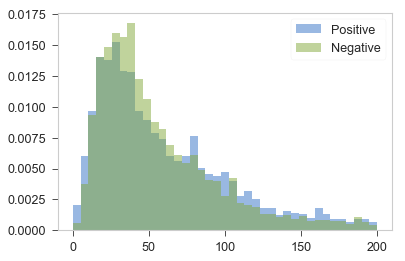

In [99]:
bins = np.linspace(0, 200, 40)

plt.hist(fullcorpusI[fullcorpusI['sentiment'] == 1]['body_length'], bins, alpha=0.5, density=True, label='Positive')
plt.hist(fullcorpusI[fullcorpusI['sentiment'] == 0]['body_length'], bins, alpha=0.5, density=True, label='Negative')
plt.legend(loc='upper right')

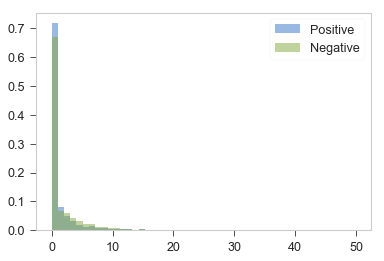

In [100]:
bins = np.linspace(0, 50, 50)

plt.hist(fullcorpusI[fullcorpusI['sentiment'] == 1]['punct%'], bins, alpha=0.5, density=True, label='Positive')
plt.hist(fullcorpusI[fullcorpusI['sentiment'] == 0]['punct%'], bins, alpha=0.5, density=True, label='Negative')
plt.legend(loc='upper right')

# Vectorization
* Process of encoding text as integers to create feature vectors. 

## Apply count vectorizer
* CountVectorizer simply counts the number of times a word appears in the document. 

In [60]:
# \W+ regular expression will split a word based on one or more non word characters. It will split on white 
# spaces, special characters etc. Although this method is now redundant. All of this has already been taken care of 
# above. 

def clean_text(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    return tokens

In [61]:
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(fullcorpusI['body_text'])
## Fit only trains the vectorizer that are in the corpus
# fit_transform will actually vectorize the dataset
print(X_counts.shape)
print(count_vect.get_feature_names())

(11300, 25631)
['', '0', '03002341366', '03004328290', '0300929358603339293586', '03097065975', '04', '0esa', '0r', '1', '10', '100', '1000', '10000000', '1000000000', '100100', '108', '109', '10960', '10days', '10g', '10mbps', '10saal', '10th', '11', '110', '1100', '1111bar', '1127', '112929', '113020', '113320', '11365', '1140', '1145', '115', '11953', '11th', '12', '120', '1200', '120mm', '122', '125', '126', '12616', '1286wan', '129', '1299', '12baje', '12june', '12lakh', '13', '130', '1300', '131', '1325', '133th', '135', '1350', '136', '138', '14', '140', '14th', '15', '150', '1500', '150000', '150gaz', '154', '15400', '16', '160', '1600', '161', '16122015', '162', '163', '164', '16th', '17', '170', '17558', '178', '18', '18000', '1811', '1821', '1828', '187', '188', '1890', '19', '190', '1900', '1902', '1908', '1909', '1910', '1912', '1914', '1917', '1918', '1919', '192', '1920', '1921', '1923', '1924', '1927', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '193

### Vectorizer outputs sparse matrix

** Sparse Matrix: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements. 

** X_counts is a document term matrix that contains the number of text messages as rows and distinct words contained in them as columns. The number represents the number of times each word occured in the text. 

In [62]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,25621,25622,25623,25624,25625,25626,25627,25628,25629,25630
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X_counts_df.columns = count_vect.get_feature_names()

In [64]:
X_counts_df.head()

,,0,03002341366,03004328290,0300929358603339293586,03097065975,04,0esa,0r,1,...,جیڑی,سی,ناں,کر,کردی,ھاں,砥nchahe,賭easar,鄭h,鄭pwa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Vectorizing raw data: N-Grams

**N-Grams** - Creates a document term matrix where ther counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length in your text.  

For example: "NLP is an interesting topic". 

| n | Name | Tokens |
|---|------|--------|
| 2 | Bigram | ["nlp is"], ["is an"], ["an interesting"], ["interesting topic"] |
| 3 | Trigram | ["nlp is an"], ["is an interesting"], ["an interesting topic"] |
| 4 | four-gram | ["nlp is an intersting"], ["is an interesting topic"] |

### Applying count vectorizer with N-Gram

In [66]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
# Count vectorizer will search in the range 2,2, meaning only bi-grams. If the range is 1,2, then it will look 
# for unigrams and bigrams. If the range is 1,3 then it will start with unigrams until trigrams including bigrams. 
X_counts_ngram = ngram_vect.fit_transform(fullcorpusI['body_text'])
print(X_counts_ngram.shape)

(11300, 112162)


In [67]:
X_count_feat = pd.concat([fullcorpusI['body_length'], fullcorpusI['punct%'], pd.DataFrame(X_counts_ngram.toarray())])

# Tfidf Vectorizer

** Inverse Document Frequency Weighting **

$w_{i,j}$ = $tf_{i,j}$ $\times$ log$\frac{N}{df_{i}}$

* $tf_{i,j}$: Number of times the word i occured in word j divided by the total number of terms (words) in j 
* $df_{i}$: Number of documents containing i
* N: Total number of documents

In [68]:
tfidf_Vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_Vect.fit_transform(fullcorpusI['body_text'])
print(X_tfidf.shape)

(11300, 25631)


In [113]:
X_tfidf_feat = pd.DataFrame(X_tfidf.toarray())

In [72]:
X_tfidf_feat = pd.concat([fullcorpusI['body_length'], fullcorpusI['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [114]:
X_tfidf_feat.shape

(11300, 25631)

In [112]:
fullcorpusI.shape

(11300, 5)

# Machine Learning Models: Random Forest

**Benefits of Random forest**

* Versatile: Can be used for regression and classification types problems
* Easily handles outliers and missing values
* Can handle various types of inputs, continuous or ordinal 
* Outputs feature importance

In [101]:
print(dir(RandomForestClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


In [102]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Explore RandomForestClassifier through Cross-Validation

In [103]:
rf = RandomForestClassifier(n_jobs=-1)
# n_jobs = -1 allows the random forests to be built parallel and allows for faster processing. 

In [104]:
k_fold = KFold(n_splits=5)

In [105]:
X_features = pd.concat([fullcorpusI['body_length'], fullcorpusI['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [116]:
cross_validate(rf, X_tfidf_feat , fullcorpusI['sentiment'], cv=k_fold, scoring='accuracy', n_jobs=-1, 
               return_train_score=True)

{'fit_time': array([53.20803905, 52.89355898, 51.96148705, 53.30927992, 51.21335697]),
 'score_time': array([0.70344591, 0.77930307, 1.1829679 , 0.75700307, 1.62841606]),
 'test_score': array([0.20575221, 0.66637168, 0.21371681, 0.64336283, 0.63362832]),
 'train_score': array([0.9829646 , 0.98539823, 0.99336283, 0.98727876, 0.99070796])}

## Explore RandomForestClassifier through a holdout set

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_feat, fullcorpusI['sentiment'], test_size=0.2)

In [123]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [124]:
print(rf_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [125]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.023621686621637206, 0),
 (0.019934716464124633, 1412),
 (0.017668479311533206, 12273),
 (0.014768864156285795, 2155),
 (0.013688838084301084, 17118),
 (0.011802991463865861, 13723),
 (0.010398398668048054, 8413),
 (0.009045470120240632, 762),
 (0.009034306409854297, 14172),
 (0.008979004783417498, 4001)]

In [126]:
y_pred = rf_model.predict(X_test)

In [127]:
precision, recall, fscore, support = score(y_test, y_pred, pos_label=0, average='micro') 
# When the labels are not binary (0 or 1) such as in this case our labels are ham or spam, we need to tell the 
# model what we want to it predict. Meaning our positive label will be 'spam'. So it can predict 'spam' labels.

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [128]:
print(precision, recall, fscore, support)

0.6672566371681415 0.6672566371681415 0.6672566371681415 None


In [129]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                         round(recall, 3),
                                                         round((y_pred == y_test).sum()/len(y_pred), 3)))

Precision: 0.667 / Recall: 0.667 / Accuracy: 0.667


# Building Machine Learning Classifiers: Explore Random Forest model with grid search 

**Grid Search**: Building a grid of hyper-parameter settings, and then exploring a model fit with each of those 
                 hyper-parameters settings.

## Build your own grid search

In [130]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, average='weighted')
    print('Estimators: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
           n_est, depth, round(precision,3), round(recall,3), round(fscore,3), 
           round((y_test == y_pred).sum()/len(y_test),3)))

In [131]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Estimators: 10 / Depth: 10 ---- Precision: 0.636 / Recall: 0.577 / Accuracy: 0.514
Estimators: 10 / Depth: 20 ---- Precision: 0.654 / Recall: 0.631 / Accuracy: 0.611
Estimators: 10 / Depth: 30 ---- Precision: 0.682 / Recall: 0.661 / Accuracy: 0.647
Estimators: 10 / Depth: None ---- Precision: 0.716 / Recall: 0.713 / Accuracy: 0.713
Estimators: 50 / Depth: 10 ---- Precision: 0.697 / Recall: 0.569 / Accuracy: 0.475
Estimators: 50 / Depth: 20 ---- Precision: 0.696 / Recall: 0.658 / Accuracy: 0.637
Estimators: 50 / Depth: 30 ---- Precision: 0.703 / Recall: 0.685 / Accuracy: 0.676
Estimators: 50 / Depth: None ---- Precision: 0.753 / Recall: 0.753 / Accuracy: 0.753
Estimators: 100 / Depth: 10 ---- Precision: 0.679 / Recall: 0.566 / Accuracy: 0.472
Estimators: 100 / Depth: 20 ---- Precision: 0.713 / Recall: 0.669 / Accuracy: 0.647
Estimators: 100 / Depth: 30 ---- Precision: 0.721 / Recall: 0.708 / Accuracy: 0.702
Estimators: 100 / Depth: None ---- Precision: 0.753 / Recall: 0.753 / Accuracy: 

# Logistic Regression & Support Vector Machines

In [133]:
lr = LogisticRegression(max_iter=100, C=1)
svm = SGDClassifier(loss='hinge')

In [134]:
def train_predict_model(classifier, 
                        train_features, train_labels, test_features, test_labels):
    # build model
    classifier.fit(train_features, train_labels)
    # predict using the model
    predictions = classifier.predict(test_features)
    return predictions

In [136]:
# creating train and test datasets
train_df = X_tfidf_feat
test_df = fullcorpusI['sentiment']

In [137]:
# Splitting the dataset into testing (20%) and training (80%) pieces
X_train, X_test, y_train, y_test = train_test_split(train_df, test_df, test_size=0.2)

In [139]:
# Logistic Regression model on urdu dataset features
lr_predictions = train_predict_model(classifier=lr, train_features=X_train, train_labels=y_train, 
                                     test_features=X_test, test_labels=y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [140]:
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    
    print('\nPredicting confusion matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)

In [142]:
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

In [144]:
def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 

In [145]:
display_model_performance_metrics(true_labels=y_test, 
                                  predicted_labels=lr_predictions,
                                  classes=[1, 0])

Model performance metrics:
------------------------------
Accuracy: 0.7969
Precision: 0.7972
Recall: 0.7969
F1 Score: 0.797

Predicting confusion matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        961  239
        0        220  840


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  if sys.path[0] == '':


In [146]:
y_test.shape

(2260,)

In [147]:
# Support Vector Machine on urdu dataset features
svm_predictions = train_predict_model(classifier=svm, train_features=X_train, train_labels=y_train, 
                                     test_features=X_test, test_labels=y_test)

In [148]:
display_model_performance_metrics(true_labels=y_test, 
                                  predicted_labels=svm_predictions,
                                  classes=[1, 0])

Model performance metrics:
------------------------------
Accuracy: 0.7973
Precision: 0.799
Recall: 0.7973
F1 Score: 0.7975

Predicting confusion matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        939  261
        0        197  863


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  if sys.path[0] == '':


In [152]:
rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)

In [153]:
# Random Forest Classifier on urdu dataset features
rf_predictions = train_predict_model(classifier=rf, train_features=X_train, train_labels=y_train, 
                                     test_features=X_test, test_labels=y_test)

In [154]:
display_model_performance_metrics(true_labels=y_test, 
                                  predicted_labels=rf_predictions,
                                  classes=[1, 0])

Model performance metrics:
------------------------------
Accuracy: 0.7522
Precision: 0.7541
Recall: 0.7522
F1 Score: 0.7525

Predicting confusion matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        885  315
        0        245  815


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  if sys.path[0] == '':


# Deep Learning Models

In [156]:
from keras.models import Sequential
from keras import layers

In [157]:
input_dim = X_train.shape[1] #Number of features

In [158]:
print(input_dim)

25631


In [162]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [163]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                256320    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 256,331
Trainable params: 256,331
Non-trainable params: 0
_________________________________________________________________


In [179]:
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [176]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing accuracy: {:.4f}".format(accuracy))

9040/9040 [==============================] - 1s 95us/step
Training Accuracy: 0.9994
2260/2260 [==============================] - 0s 94us/step
Testing accuracy: 0.7540


In [177]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc)+1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

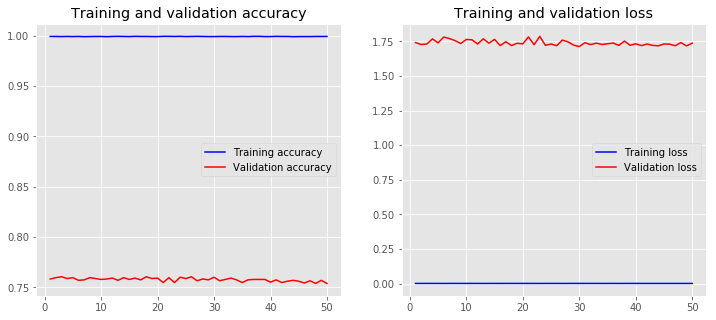

In [178]:
plot_history(history)